In [36]:
from riskeye.utils.data import get_all_behavior, get_all_eyepos_info
import seaborn as sns
import numpy as np
import scipy.stats as ss
import os.path as op
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd

target_dir = '/data/ds-riskeye/derivatives/figures'
dist = ss.norm(loc=3.5, scale=1./ss.norm().ppf(0.8) * (3.5-1))

In [37]:
df = get_all_behavior()
df['Experiment'] = df.index.get_level_values('exptype').map({'symbolic':'Symbols', 'non-symbolic':'Coin clouds'})

df['saw_risky_first'] = ((df['first_saccade'] == 'left_option') & (df['p_left']==0.55)) | ((df['first_saccade'] == 'right_option') & (df['p_right']==.55))
df['Fixated first'] = df['saw_risky_first'].map({True:'Risky', False:'Safe'})

def get_risk_bin(d, n_risk_bins=6):
    try: 
        return pd.qcut(d, n_risk_bins, range(1, n_risk_bins+1))
    except Exception as e:
        n = len(d)
        ix = np.linspace(1, n_risk_bins+1, n, False)

        d[d.sort_values().index] = np.floor(ix)
        
        return d
df['bin(risky/safe)'] = df.groupby(['subject'], group_keys=False)['log(risky/safe)'].apply(get_risk_bin)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/1541560524.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject', 'Fixated first', 'Experiment', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/1541560524.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','Fixated first', 'n_safe', 'Experiment']).mean()


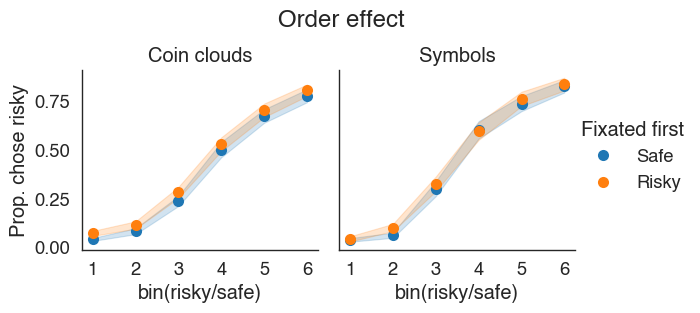

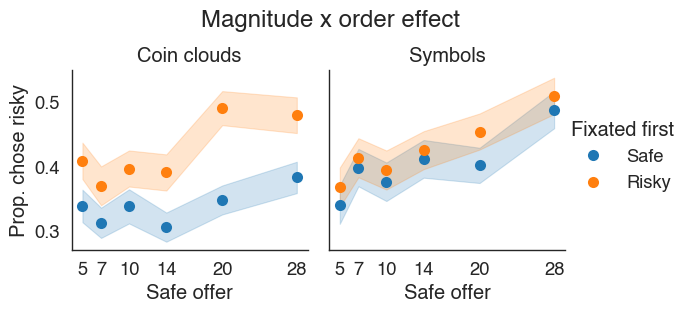

In [38]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df.reset_index().groupby(['subject', 'Fixated first', 'Experiment', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),hue='Fixated first', hue_order=['Safe', 'Risky'], col='Experiment')
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8, markeredgewidth=0)
g.set_titles('{col_name}')
g.set(ylabel='Prop. chose risky', xticks=range(1, 7))
g.fig.suptitle('Order effect', fontweight='bold', y=1.05)

g.add_legend()

tmp = df.reset_index().groupby(['subject','Fixated first', 'n_safe', 'Experiment']).mean()

g.savefig(op.join(target_dir, 'order_effect.pdf'))

g = sns.FacetGrid(data=tmp.reset_index(),hue='Fixated first', col='Experiment', hue_order=['Safe', 'Risky'])
sns.despine()
# plt.ylim(0, 1)

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markeredgewidth=0, markersize=8)
g.set_titles('{col_name}')
g.set(ylabel='Prop. chose risky', xlabel='Safe offer', xticks=df.n_safe.unique())
g.fig.suptitle('Magnitude x order effect', fontweight='bold', y=1.05)

g.add_legend()
g.savefig(op.join(target_dir, 'mag_order_effect.pdf'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/2260908475.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df[~df.first_saccade.isnull()].reset_index().groupby(['subject', 'risky_duration_prop_split', 'Experiment', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/2260908475.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df[~df.first_saccade.isnull()].reset_index().groupby(['subject','risky_duration_prop_split', 'n_safe', 'Experiment']).mean().reset_index()


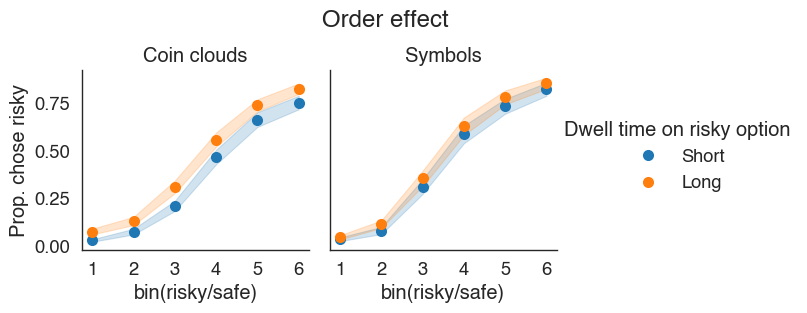

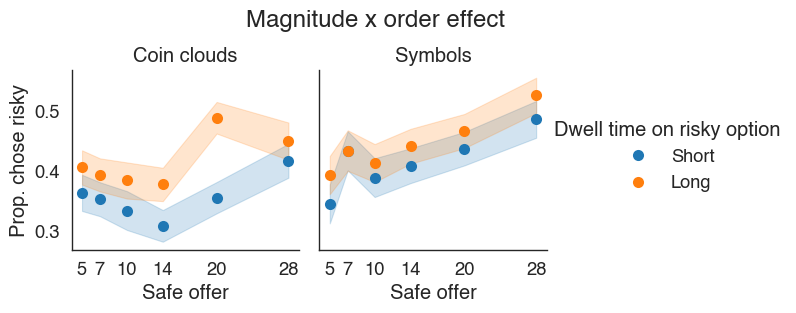

In [39]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df[~df.first_saccade.isnull()].reset_index().groupby(['subject', 'risky_duration_prop_split', 'Experiment', 'bin(risky/safe)']).mean()

tmp = tmp.reset_index()
tmp['risky_duration_prop_split'] = tmp['risky_duration_prop_split'].map({'low':'Short', 'high':'Long'})

g = sns.FacetGrid(data=tmp.reset_index(),hue='risky_duration_prop_split', col='Experiment', hue_order=['Short', 'Long'])
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8, markeredgewidth=0)
g.set_titles('{col_name}')
g.set(ylabel='Prop. chose risky', xticks=range(1, 7))
g.fig.suptitle('Order effect', fontweight='bold', y=1.05)

g.add_legend(title='Dwell time on risky option')

tmp = df[~df.first_saccade.isnull()].reset_index().groupby(['subject','risky_duration_prop_split', 'n_safe', 'Experiment']).mean().reset_index()
tmp['risky_duration_prop_split'] = tmp['risky_duration_prop_split'].map({'low':'Short', 'high':'Long'})

g.savefig(op.join(target_dir, 'dwelltime_effect.pdf'))

g = sns.FacetGrid(data=tmp.reset_index(),hue='risky_duration_prop_split', col='Experiment', hue_order=['Short', 'Long'])
sns.despine()
# plt.ylim(0, 1)

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markeredgewidth=0, markersize=8)
g.set_titles('{col_name}')

g.set(ylabel='Prop. chose risky', xlabel='Safe offer', xticks=df.n_safe.unique())
g.fig.suptitle('Magnitude x order effect', fontweight='bold', y=1.05)

g.add_legend(title='Dwell time on risky option')
g.savefig(op.join(target_dir, 'dwelltime_magnitude_effect.pdf'))

In [40]:
import bambi as bmb

In [41]:
tmp = df.xs('non-symbolic', 0, 'exptype').groupby(['subject', 'n_safe', 'bin(risky/safe)']).mean()
tmp['bin'] = tmp.index.get_level_values('bin(risky/safe)')
tmp = tmp.reset_index()


md = smf.mixedlm("chose_risky ~ n_safe * bin", tmp, groups=tmp["subject"]).fit()
md.summary()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/724752240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.xs('non-symbolic', 0, 'exptype').groupby(['subject', 'n_safe', 'bin(risky/safe)']).mean()


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: chose_risky
No. Observations: 2202    Method:             REML       
No. Groups:       63      Scale:              0.0492     
Min. group size:  29      Log-Likelihood:     76.5725    
Max. group size:  36      Converged:          Yes        
Mean group size:  35.0                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.148    0.030 -4.867 0.000 -0.208 -0.089
n_safe         -0.002    0.001 -1.132 0.258 -0.004  0.001
bin             0.139    0.006 24.713 0.000  0.128  0.150
n_safe:bin      0.002    0.000  4.785 0.000  0.001  0.002
Group Var       0.028    0.025                           
=========================================================

"""

In [42]:
tmp = df.xs('symbolic', 0, 'exptype').groupby(['subject', 'n_safe', 'bin(risky/safe)']).mean()
tmp['bin'] = tmp.index.get_level_values('bin(risky/safe)')
tmp = tmp.reset_index()


md = smf.mixedlm("chose_risky ~ n_safe * bin", tmp, groups=tmp["subject"]).fit()
md.summary()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/3565342833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.xs('symbolic', 0, 'exptype').groupby(['subject', 'n_safe', 'bin(risky/safe)']).mean()


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: chose_risky
No. Observations: 2206    Method:             REML       
No. Groups:       63      Scale:              0.0576     
Min. group size:  32      Log-Likelihood:     -97.7947   
Max. group size:  36      Converged:          Yes        
Mean group size:  35.0                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.189    0.033 -5.689 0.000 -0.254 -0.124
n_safe          0.000    0.001  0.078 0.938 -0.003  0.003
bin             0.156    0.006 25.767 0.000  0.145  0.168
n_safe:bin      0.002    0.000  4.266 0.000  0.001  0.002
Group Var       0.034    0.027                           
=========================================================

"""

In [43]:
df['saw_risky_last'] = ((df['last_saccade'] == 'left_option') & (df['p_left']==0.55)) | ((df['last_saccade'] == 'right_option') & (df['p_right']==.55))

df['Last fixation'] = df['saw_risky_last'].map({True:'Risky', False:'Safe'})

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/979591533.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject', 'Last fixation', 'Experiment', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/979591533.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','Last fixation', 'n_safe', 'Experiment']).mean()


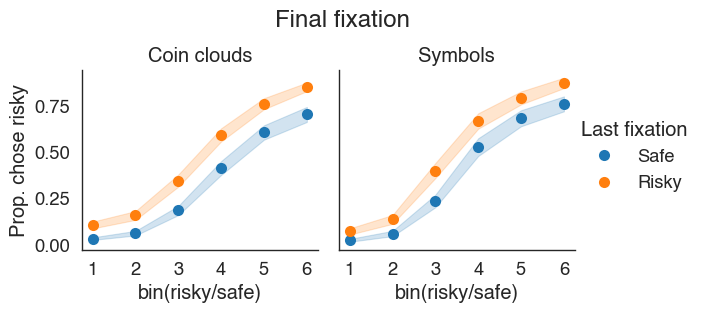

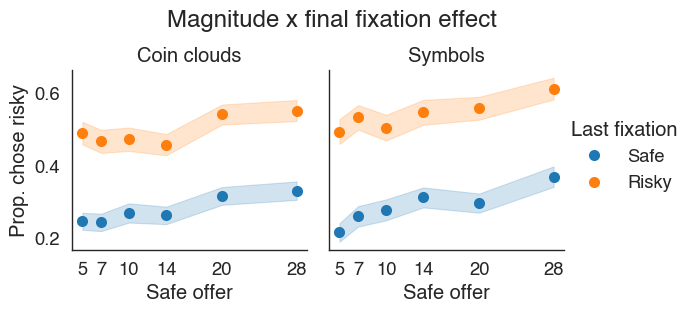

In [44]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df.reset_index().groupby(['subject', 'Last fixation', 'Experiment', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),hue='Last fixation', hue_order=['Safe', 'Risky'], col='Experiment')
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8, markeredgewidth=0)
g.set_titles('{col_name}')
g.set(ylabel='Prop. chose risky', xticks=range(1, 7))
g.fig.suptitle('Final fixation', fontweight='bold', y=1.05)

g.add_legend()

tmp = df.reset_index().groupby(['subject','Last fixation', 'n_safe', 'Experiment']).mean()

g.savefig(op.join(target_dir, 'last_fixation_effect.pdf'))

g = sns.FacetGrid(data=tmp.reset_index(),hue='Last fixation', col='Experiment', hue_order=['Safe', 'Risky'])
sns.despine()
# plt.ylim(0, 1)

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markeredgewidth=0, markersize=8)
g.set_titles('{col_name}')
g.set(ylabel='Prop. chose risky', xlabel='Safe offer', xticks=df.n_safe.unique())
g.fig.suptitle('Magnitude x final fixation effect', fontweight='bold', y=1.05)

g.add_legend()
g.savefig(op.join(target_dir, 'mag_last_fixation_effect.pdf'))

In [45]:
df

accuracy     rt  leftRight  \
subject run block trial exptype      n_saccades                               
01      1   1     1     symbolic     6                  1  1.215          1   
                  2     symbolic     3                  1  0.737         -1   
                  3     symbolic     2                  1  0.920         -1   
                  4     symbolic     1                  1  0.965         -1   
                  5     symbolic     1                  1  1.218          1   
...                                                   ...    ...        ...   
64      5   2     20    non-symbolic 2                  1  0.674          1   
                  21    non-symbolic 2                  0  0.915          1   
                  22    non-symbolic 2                  1  0.669          1   
                  23    non-symbolic 2                  1  0.822         -1   
                  24    non-symbolic 2                  1  1.015          1   

                                                 pressedKey  n_safe  n_risky  \
subject run block trial exptype      n_saccades                                
01      1   1     1     symbolic     6                   75      14       47   
                  2     symbolic     3                   77       5        6   
                  3     symbolic     2                   77      14       17   
                  4     symbolic     1                   77      10       12   
                  5     symbolic     1                   75      14       28   
...                                                     ...     ...      ...   
64      5   2     20    non-symbolic 2                   75      14       15   
                  21    non-symbolic 2                   75       5       12   
                  22    non-symbolic 2                   75      10       12   
                  23    non-symbolic 2                   77       5       20   
                  24    non-symbolic 2                   75      20       22   

                                                 constSide  correct_perm  \
subject run block trial exptype      n_saccades                            
01      1   1     1     symbolic     6                   0            -1   
                  2     symbolic     3                   0             1   
                  3     symbolic     2                   0             1   
                  4     symbolic     1                   0             1   
                  5     symbolic     1                   0            -1   
...                                                    ...           ...   
64      5   2     20    non-symbolic 2                   0             1   
                  21    non-symbolic 2                   0            -1   
                  22    non-symbolic 2                   0             1   
                  23    non-symbolic 2                   0            -1   
                  24    non-symbolic 2                   0             1   

                                                 reset    onset  ...  \
subject run block trial exptype      n_saccades                  ...   
01      1   1     1     symbolic     6              -1    6.065  ...   
                  2     symbolic     3              -1   11.708  ...   
                  3     symbolic     2              -1   17.284  ...   
                  4     symbolic     1              -1   22.882  ...   
                  5     symbolic     1              -1   28.471  ...   
...                                                ...      ...  ...   
64      5   2     20    non-symbolic 2               1  248.035  ...   
                  21    non-symbolic 2               1  253.570  ...   
                  22    non-symbolic 2               1  259.087  ...   
                  23    non-symbolic 2               1  264.623  ...   
                  24    non-symbolic 2               1  270.161  ...   

                                                 fixat

In [46]:
df['risky_duration'] = df['left_duration'].where(df['p_left'] == 0.55, df['right_duration'])
df['safe_duration'] = df['left_duration'].where(df['p_left'] == 1.0, df['right_duration'])
df['fixation_duration'] = df['risky_duration'] + df['safe_duration']

df['risky_duration_prop'] = df['risky_duration'] / df['fixation_duration']

In [47]:
df['risky_duration_prop_split'] = df.groupby(['subject', 'exptype', 'n_safe', 'n_risky'], group_keys=False)['risky_duration_prop'].apply(lambda x: (x > np.nanmedian(x)).map({True:'high', False:'low'}) if ((len(x) > 1) and (not x.isnull().any())) else pd.Series([np.nan]*len(x), index=x.index))

In [48]:
df['left_duration_prop'] = df['left_duration'] / df['fixation_duration']

In [49]:
df['left_duration_prop_split'] = df.groupby(['subject', 'exptype', 'n_safe', 'n_risky'], group_keys=False)['left_duration_prop'].apply(lambda x: (x > np.nanmedian(x)).map({True:'high', False:'low'}) if ((len(x) > 1) and (not x.isnull().any())) else pd.Series([np.nan]*len(x), index=x.index))

In [50]:
df['choice'] = df['leftRight'] == -1

In [51]:
df['ev2'] = df['p_right'] * df['n_right']

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/2510029269.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lmplot(df.groupby(['subject', 'Experiment', 'log(risky/safe)', 'left_duration_prop_split']).mean().reset_index(), x='ev2',  y='choice', hue='left_duration_prop_split', col='Experiment', logistic=True, scatter=False)


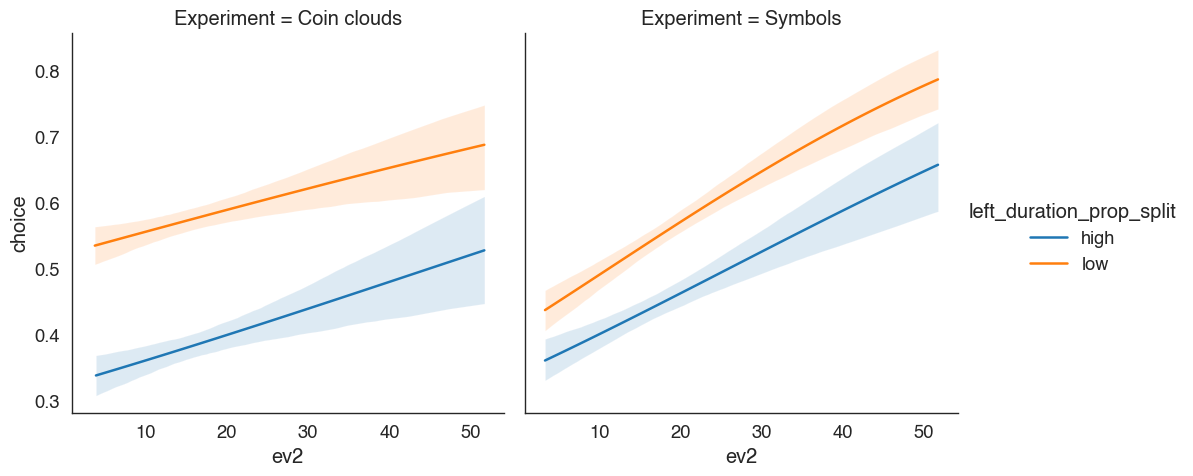

In [53]:
sns.lmplot(df.groupby(['subject', 'Experiment', 'log(risky/safe)', 'left_duration_prop_split']).mean().reset_index(), x='ev2',  y='choice', hue='left_duration_prop_split', col='Experiment', logistic=True, scatter=False)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_60393/1345498189.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.lmplot(df.groupby(['subject', 'Experiment', 'log(risky/safe)', 'risky_duration_prop_split']).mean().reset_index(), x='log(risky/safe)',  y='chose_risky', hue='risky_duration_prop_split', col='Experiment', logistic=True, scatter=False)


NameError: name 'plt' is not defined

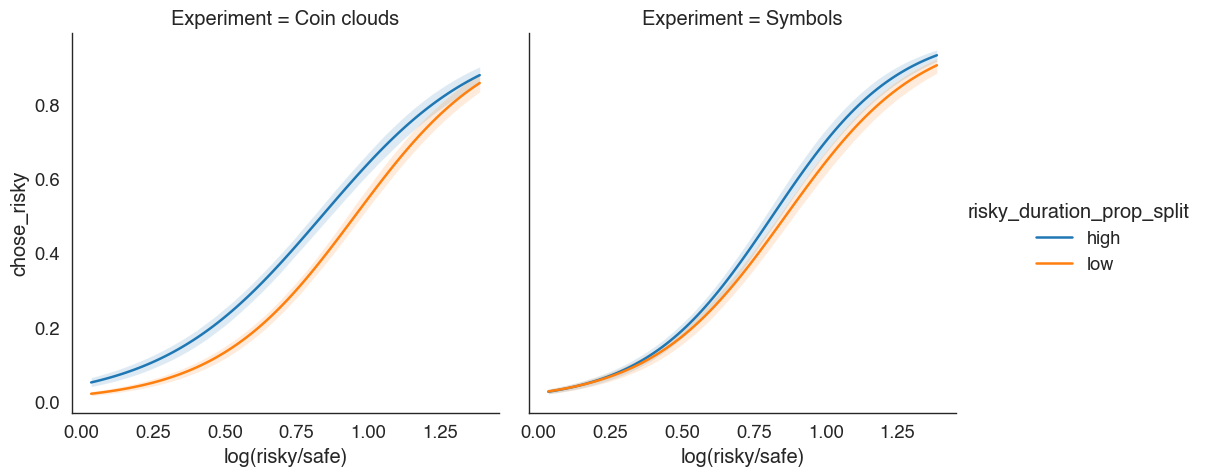

In [54]:
g = sns.lmplot(df.groupby(['subject', 'Experiment', 'log(risky/safe)', 'risky_duration_prop_split']).mean().reset_index(), x='log(risky/safe)',  y='chose_risky', hue='risky_duration_prop_split', col='Experiment', logistic=True, scatter=False)

g.map(lambda *args, **kwargs: plt.axvline(np.log(1/.55), c='k', ls='--'))

In [ ]:
sns.catplot(df.groupby(['subject','Experiment', 'n_safe', 'risky_duration_prop_split',]).mean().reset_index(), x='n_safe', y='chose_risky', hue='risky_duration_prop_split', kind='point', col='Experiment', errorbar='se')

NameError: name 'sns' is not defined

In [ ]:
from patsy import dmatrix

<Axes: ylabel='Count'>

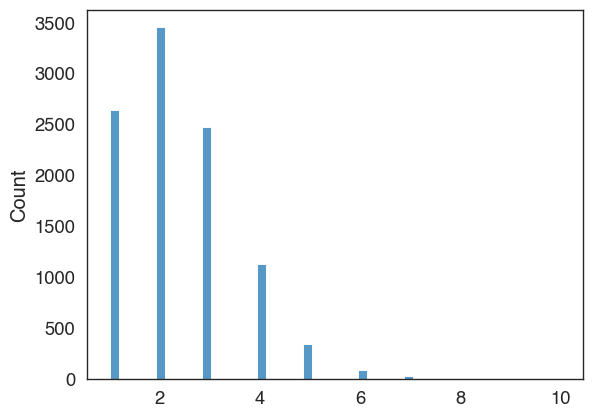

In [58]:
sns.histplot(df.groupby(['subject', 'Experiment', 'n_safe', 'n_risky', 'risky_duration_prop_split']).size())

In [19]:
x = dmatrix('first_saccade*exptype', df.reset_index())

np.asarray(x), x.design_info.column_names

(array([[1., 0., 1., 0.],
        [1., 1., 1., 1.],
        [1., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.]]),
 ['Intercept',
  'first_saccade[T.right_option]',
  'exptype[T.symbolic]',
  'first_saccade[T.right_option]:exptype[T.symbolic]'])

In [23]:
df['first_saccade_left11'] = 1
df['first_saccade_left11'] = df['first_saccade_left11'].where(df['first_saccade'] == 'left_option', -1)

In [27]:
df['first_saccade_right11'] = 1
df['first_saccade_right11'] = df['first_saccade_right11'].where(df['first_saccade'] == 'right_option', -1)

In [30]:
x = dmatrix('0 + first_saccade_left11 + first_saccade_left11:exptype', df.reset_index())
np.asarray(x), x.design_info.column_names

(array([[ 1.,  1.],
        [-1., -1.],
        [ 1.,  1.],
        ...,
        [ 1.,  0.],
        [ 1.,  0.],
        [-1., -0.]]),
 ['first_saccade_left11', 'first_saccade_left11:exptype[T.symbolic]'])

In [20]:
x = dmatrix('0+first_saccade*exptype', df.reset_index())
np.asarray(x), x.design_info.column_names

(array([[1., 0., 1., 0.],
        [0., 1., 1., 1.],
        [1., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]]),
 ['first_saccade[left_option]',
  'first_saccade[right_option]',
  'exptype[T.symbolic]',
  'first_saccade[T.right_option]:exptype[T.symbolic]'])

In [32]:
df.columns

Index(['accuracy', 'rt', 'leftRight', 'pressedKey', 'n_safe', 'n_risky',
       'constSide', 'correct_perm', 'reset', 'onset', 'n_left', 'n_right',
       'p_left', 'p_right', 'chose_risky', 'log(risky/safe)',
       'bin(risky/safe)', 'Experiment', 'first_saccade', 'last_saccade',
       'left_duration', 'right_duration', 'saw_risky_first', 'Fixated first',
       'first_saccade_left11', 'first_saccade_right11'],
      dtype='object')